# Populations

In [51]:
import pandas as pd
import numpy as np

df = pd.read_csv('populations.txt',
                 sep='\t',
                 names=['year', 'hare', 'lynx', 'carrot'],
                 index_col='year',
                 skiprows=1)
df.head()

,hare,lynx,carrot
year,,,
1900,30000.0,4000.0,48300
1901,47200.0,6100.0,48200
1902,70200.0,9800.0,41500
1903,77400.0,35200.0,38200
1904,36300.0,59400.0,40600


## The mean and std of the populations of each species for the years in the period

In [6]:
means = df.apply(np.mean)
means

hare      34080.952381
lynx      20166.666667
carrot    42400.000000
dtype: float64

In [7]:
st_dev = df.apply(np.std)
st_dev

hare      20897.906458
lynx      16254.591537
carrot     3322.506226
dtype: float64

## Which year each species had the largest population

In [8]:
max_years = df.apply(np.argmax)
max_years

/home/nicolo/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


hare      1903
lynx      1904
carrot    1900
dtype: int64

## Which species has the largest population for each year. (Hint: rank and idxmin)

In [9]:
max_species = df.idxmax(axis=1)
max_species

year
1900    carrot
1901    carrot
1902      hare
1903      hare
1904      lynx
1905      lynx
1906    carrot
1907    carrot
1908    carrot
1909    carrot
1910    carrot
1911    carrot
1912      hare
1913      hare
1914      hare
1915      lynx
1916    carrot
1917    carrot
1918    carrot
1919    carrot
1920    carrot
dtype: object

## Which years any of the populations is above 50000. (Hint: any)

In [19]:
large_years = df[df > 50000].dropna(how='all').index
large_years

Int64Index([1902, 1903, 1904, 1912, 1913, 1914, 1915], dtype='int64', name='year')

## The top 2 years for each species when they had the lowest populations. (Hint: rank)

In [76]:
df.apply(lambda x: x.rank()).idxmin()

hare      1917
lynx      1900
carrot    1916
dtype: int64

In [72]:
df.apply(lambda x: pd.Series(x.nsmallest(2).index))

,hare,lynx,carrot
0,1917,1900,1916
1,1916,1901,1903


## Compare (plot) the change in hare population (see help(np.gradient)) and the number of lynxes. Check correlation (see help(df.corr))

In [71]:
import numpy as np
import matplotlib as plt

%matplotlib inline

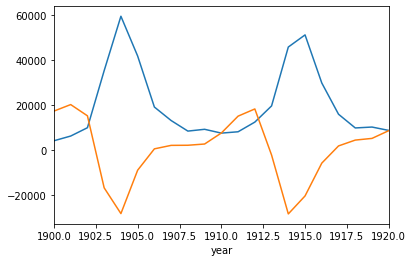

In [99]:
df['hare_gradient'] = np.gradient(df['hare'])

df['lynx'].plot()
df['hare_gradient'].plot()

In [100]:
df.corr()

,hare,lynx,carrot,hare_gradient
hare,1.000000,0.071892,-0.016604,-0.006390
lynx,0.071892,1.000000,-0.680577,-0.917925
carrot,-0.016604,-0.680577,1.000000,0.718199
hare_gradient,-0.006390,-0.917925,0.718199,1.000000
